# 1.Setup

In [1]:
import tensorflow as tf
import os
from tensorflow import keras
import PIL
import PIL.Image

2023-08-04 11:37:38.247384: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-04 11:37:38.892577: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
!pip list

/bin/bash: /home/admpdi/anaconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Package                       Version
----------------------------- ---------
absl-py                       1.4.0
asttokens                     2.2.1
astunparse                    1.6.3
backcall                      0.2.0
backports.functools-lru-cache 1.6.5
cachetools                    5.3.1
certifi                       2023.7.22
charset-normalizer            3.2.0
contourpy                     1.1.0
cycler                        0.11.0
debugpy                       1.5.1
decorator                     5.1.1
executing                     1.2.0
flatbuffers                   23.5.26
fonttools                     4.41.1
gast                          0.4.0
google-auth                   2.22.0
google-auth-oauthlib          1.0.0
google-pasta                  0.2.0
grpcio                        1.56.2
h5py                          3.9.0
idna                          3.4
impo

In [3]:
# # Avoid OOM errors by setting GPU Memory Consumption Growth
# # Define set_memory_growth que mantenha o consumo do memoria da gpu no minimo ou que seja necessario.
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus: 
#     tf.config.experimental.set_memory_growth(gpu, True)


In [4]:
tf.config.list_physical_devices(
    device_type=None
)

2023-08-04 11:37:40.253451: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-04 11:37:40.276640: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-04 11:37:40.276838: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Elimina imagens corrompidas

In [5]:
import cv2
import imghdr

/tmp/ipykernel_24837/4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
data_dir = 'data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
# De acordo aos formatos determinados em image.exts qualquera que não esteja nesse formato será eliminado
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
#data = tf.keras.utils.image_dataset_from_directory('data')
data = tf.keras.utils.image_dataset_from_directory('data',batch_size=5)
#Cria um "generator" dentro da variavel data, mostrando a quantidade de arquivos e classes que têm como seu formato especifico 

Found 6237 files belonging to 3 classes.


2023-08-04 11:37:47.301277: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-04 11:37:47.301427: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-04 11:37:47.301518: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [38]:
#A partir do generator se pode convertir em um registro dos dados que queremos(as_numpy_iterator)
data_iterator = data.as_numpy_iterator()

In [11]:
data_iterator

In [12]:
# Utilizando os numpy iterator se pode obter o lote de dados(seria como tamanho de matriz dos diferentes lote de dados) os diferentes tamanhos
#dos lotes podem ser configurados utilizando
batch = data_iterator.next()

In [13]:
batch

(array([[[[111.25, 111.25, 111.25],
          [ 63.75,  63.75,  63.75],
          [ 41.25,  41.25,  41.25],
          ...,
          [121.  , 121.  , 121.  ],
          [126.25, 126.25, 126.25],
          [ 85.5 ,  85.5 ,  85.5 ]],
 
         [[138.25, 138.25, 138.25],
          [127.5 , 127.5 , 127.5 ],
          [ 63.75,  63.75,  63.75],
          ...,
          [118.25, 118.25, 118.25],
          [122.  , 122.  , 122.  ],
          [ 84.25,  84.25,  84.25]],
 
         [[ 69.25,  69.25,  69.25],
          [191.25, 191.25, 191.25],
          [  0.  ,   0.  ,   0.  ],
          ...,
          [115.5 , 115.5 , 115.5 ],
          [119.  , 119.  , 119.  ],
          [ 81.  ,  81.  ,  81.  ]],
 
         ...,
 
         [[255.  , 255.  , 255.  ],
          [255.  , 255.  , 255.  ],
          [255.  , 255.  , 255.  ],
          ...,
          [255.  , 255.  , 255.  ],
          [255.  , 255.  , 255.  ],
          [147.5 , 147.5 , 147.5 ]],
 
         [[255.  , 255.  , 255.  ],
          [2

In [14]:
#Images represented as numpy arrays
batch[0].shape

(5, 256, 256, 3)

In [15]:
#batch[0] contem a matrices dos dados e 
#batch[1] contem a sua classificação
batch[1]

array([2, 0, 0, 0, 2], dtype=int32)

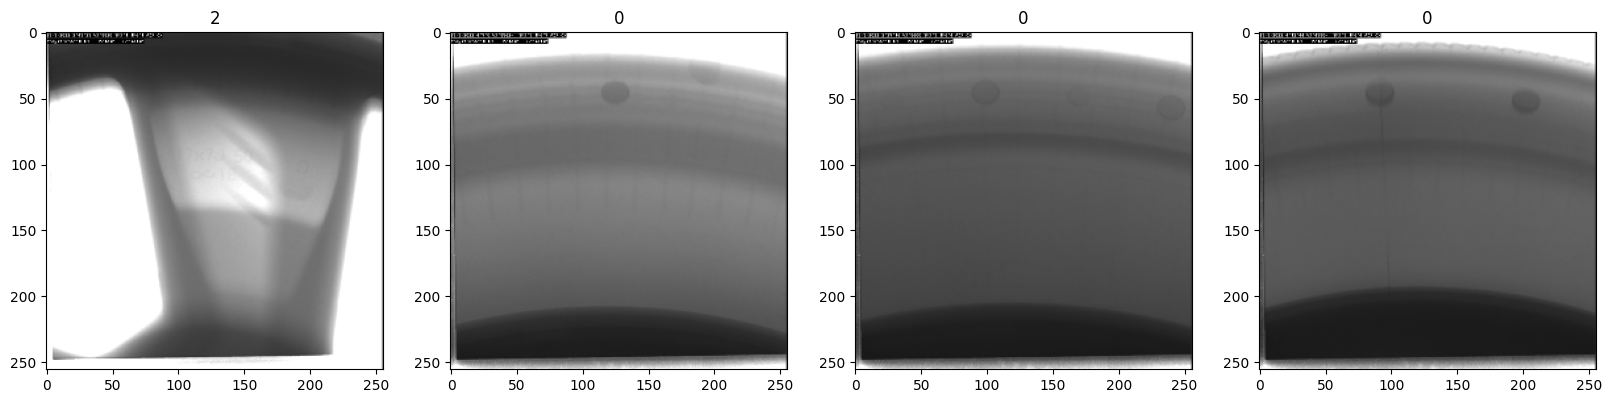

In [16]:
#class 0 aro
#class 1 cubo
#class 2 raio

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [17]:
#Utiliza uma transformação do dados utilizando y=x/255 deixando os valores dos dados de 0 a 1
data = data.map(lambda x,y: (x/255, y))

In [18]:
##############Teste de verificação dos batch de dados logo do reescalamento####################3
#scaled_iterator=data.as_numpy_iterator()
#batch=scaled_iterator.next()
# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img)
#     ax[idx].title.set_text(batch[1][idx])

In [19]:
len(data)

1248

# 5. Split Data

In [49]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE=(256, 256)
BATCH_SIZE=20

#Pre-processing ImageDataGenerator

# 2. shear_range: É um valor que define o intervalo de cisalhamento (shearing) aleatório a ser aplicado nas imagens. O cisalhamento é uma transformação geométrica que desloca as linhas paralelas em uma imagem. Essa operação pode ajudar a melhorar a generalização do modelo.

# 3. zoom_range: Define o intervalo de zoom aleatório que pode ser aplicado nas imagens. Isso permite que as imagens sejam aumentadas ou reduzidas aleatoriamente. O zoom também pode ajudar a melhorar a robustez do modelo.

# 4. horizontal_flip: Essa configuração define se as imagens devem ou não serem espelhadas horizontalmente de forma aleatória. Isso aumenta a diversidade dos dados e ajuda a prevenir o overfitting.

# 5. validation_split: Define a proporção dos dados de treinamento que devem ser usados para validação durante o treinamento. Neste caso, 10% dos dados serão usados para validação e os 90% restantes serão usados para treinamento.

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.2
    )


# Usamos 'subset' para definir que é o conjunto de "training" ou conjunto de "validation"
#Class mode: 1-Binary 2-'categorical' para classificação multiclasse

gerador_train = train_datagen.flow_from_directory(
    data_dir,
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    subset = 'training'
)

gerador_test = train_datagen.flow_from_directory(
    data_dir,
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    subset='validation'
)

Found 4991 images belonging to 3 classes.
Found 1246 images belonging to 3 classes.


# 6. Build Deep Learning Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
#Variaveis
 
INPUT_SHAPE = (256, 256, 3); #O ultimo termo esta relacionado ao tipo de imagem no caso 3 é RGB

#Tamanho dos filtros
FILTER1_SIZE = 32;
FILTER2_SIZE = 64;
FILTER3_SIZE = 128;
FILTER_SHAPE = (3,3);


POOL_SHAPE = (2, 2);
FULLY_CONNECT_NUM = 128;
NUM_CLASSES = 3;

model = Sequential()

model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE, activation='relu',input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(POOL_SHAPE))

model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model.add(MaxPooling2D(POOL_SHAPE))

model.add(Conv2D(FILTER3_SIZE, FILTER_SHAPE, activation='relu'))
model.add(MaxPooling2D(POOL_SHAPE))

model.add(Flatten())

# 'Softmax' é uma função de ativação que transforma os valores de saída em uma distribuição de probabilidade sobre as classes. Ela é especialmente útil quando você tem mais de duas classes.
# 'Sigmoide' para duas classes.
model.add(Dense(FULLY_CONNECT_NUM, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))


In [24]:
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.losses import sparse_categorical_crossentropy

#METRICS = metrics=['accuracy',Precision(name='precision'),Recall(name='recall')]
#model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=METRICS)

# Compile o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

# 7. Train

In [26]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
# Obter um batch de dados do gerador_train
x_train_batch,y_train_batch = next(gerador_train)

# Obter um batch de dados do gerador_test
x_test_batch,y_test_batch = next(gerador_test)

In [28]:

# hist = model.fit(x_train_batch,y_train_batch,
#                 epochs=10,
#                 validation_data= (x_test_batch,y_test_batch),
#                 callbacks=[tensorboard_callback]
#                 )

hist = model.fit(gerador_train,
                epochs=20,
                validation_data= gerador_test,
                callbacks=[tensorboard_callback]
                )


Epoch 1/20


2023-08-04 11:37:49.122816: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-08-04 11:37:49.912913: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-08-04 11:37:49.984236: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-04 11:37:53.272857: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7fc07c007850 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-04 11:37:53.272885: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): Quadro P400, Compute Capability 6.1
2023-08-04 11:37:53.276379: I tensorflow/compiler/mlir/tensorflow/utils/dump_ml

250/250 [==============================] - ETA: 0s - loss: 0.2165 - accuracy: 0.9313

2023-08-04 11:39:38.503203: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


250/250 [==============================] - 125s 454ms/step - loss: 0.2165 - accuracy: 0.9313 - val_loss: 0.0088 - val_accuracy: 0.9984
Epoch 2/20
250/250 [==============================] - 90s 359ms/step - loss: 0.0290 - accuracy: 0.9916 - val_loss: 0.0102 - val_accuracy: 0.9992
Epoch 3/20
250/250 [==============================] - 85s 341ms/step - loss: 0.0171 - accuracy: 0.9962 - val_loss: 0.0061 - val_accuracy: 0.9992
Epoch 4/20
250/250 [==============================] - 80s 318ms/step - loss: 0.0148 - accuracy: 0.9960 - val_loss: 0.0049 - val_accuracy: 0.9992
Epoch 5/20
250/250 [==============================] - 79s 317ms/step - loss: 0.0123 - accuracy: 0.9964 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 6/20
250/250 [==============================] - 79s 316ms/step - loss: 0.0153 - accuracy: 0.9966 - val_loss: 0.0078 - val_accuracy: 0.9968
Epoch 7/20
250/250 [==============================] - 79s 317ms/step - loss: 0.0074 - accuracy: 0.9984 - val_loss: 0.0061 - val_accuracy: 0.

# 8. Plot Performance

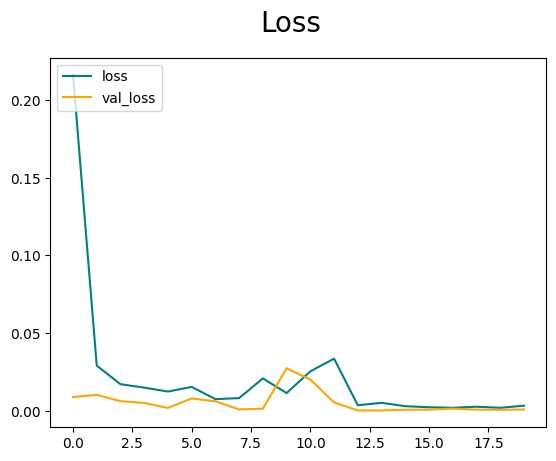

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

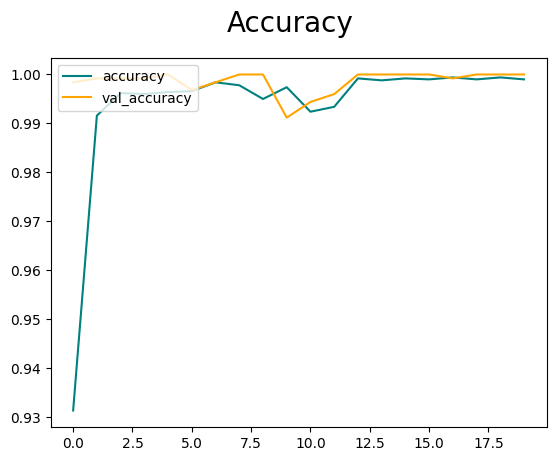

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [31]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [32]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [53]:
# for batch in test.as_numpy_iterator(): 
#     X, y= batch
#     yhat = model.predict(X)
#     pre.update_state(y, yhat)
#     re.update_state(y, yhat)
#     acc.update_state(y, yhat)

In [54]:
# print(pre.result(), re.result(), acc.result())

# 10. Test

In [55]:
import cv2

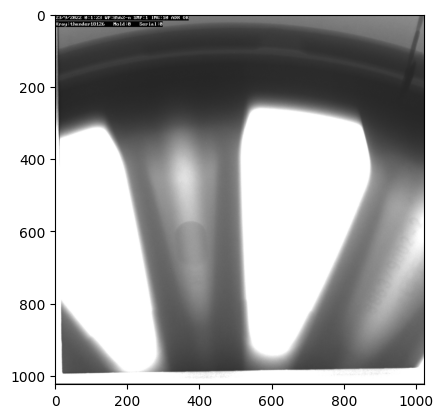

In [56]:
img = cv2.imread('00.01.23P228604W36V1I10A0S0M0N8562-nR1E0Othund.bmp')
plt.imshow(img)
plt.show()

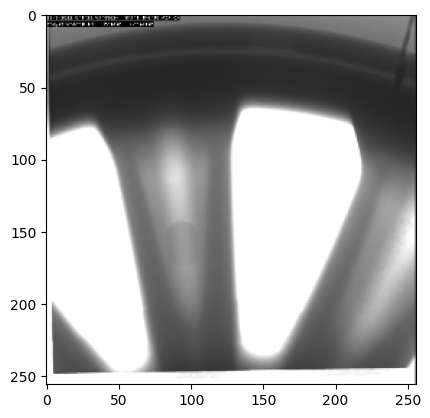

In [57]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [65]:
yhat = model.predict(np.expand_dims(resize/255, 0))
value=np.argmax(yhat)

1/1 [==============================] - 0s 16ms/step


In [66]:
if value > 1.5: 
    print(f'Predicted class is Raio')
elif value > 0.5:
    print(f'Predicted class is Cubo')
else:
    print(f'Predicted class is aro')

Predicted class is Raio


# 11. Save the Model

In [72]:
from tensorflow.keras.models import load_model

In [73]:
model.save(os.path.join('models','imageclassifier_ale.h5'))

In [76]:
new_model = load_model(os.path.join('models','imageclassifier_ale.h5'))

In [78]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))
value_new = np.argmax(yhat_new)

1/1 [==============================] - 0s 17ms/step


In [79]:
if value_new > 1.5: 
    print(f'Predicted class is Raio')
elif value > 0.5:
    print(f'Predicted class is Cubo')
else:
    print(f'Predicted class is aro')

Predicted class is Raio
